# Deep Q-Network (DQN) - Acrobot
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
#!pip3 install box2d
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# uncomment for ubuntu:
#!python -m pip install pyvirtualdisplay
#from pyvirtualdisplay import Display
#display = Display(visible=0, size=(1400, 900))
#display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = gym.make('Acrobot-v1')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (6,)
Number of actions:  3



    Acrobot is a 2-link pendulum with only the second joint actuated.
    Initially, both links point downwards. The goal is to swing the
    end-effector at a height at least the length of one link above the base.
    Both links can swing freely and can pass by each other, i.e., they don't
    collide when they have the same angle.
    **STATE:**
    The state consists of the sin() and cos() of the two rotational joint
    angles and the joint angular velocities :
    [cos(theta1) sin(theta1) cos(theta2) sin(theta2) thetaDot1 thetaDot2].
    For the first link, an angle of 0 corresponds to the link pointing downwards.
    The angle of the second link is relative to the angle of the first link.
    An angle of 0 corresponds to having the same angle between the two links.
    A state of [1, 0, 1, 0, ..., ...] means that both links point downwards.
    **ACTIONS:**
    The action is either applying +1, 0 or -1 torque on the joint between
    the two pendulum links.
    .. note::
        The dynamics equations were missing some terms in the NIPS paper which
        are present in the book. R. Sutton confirmed in personal correspondence
        that the experimental results shown in the paper and the book were
        generated with the equations shown in the book.
        However, there is the option to run the domain with the paper equations
        by setting book_or_nips = 'nips'
    **REFERENCE:**
    .. seealso::
        R. Sutton: Generalization in Reinforcement Learning:
        Successful Examples Using Sparse Coarse Coding (NIPS 1996)
    .. seealso::
        R. Sutton and A. G. Barto:
        Reinforcement learning: An introduction.
        Cambridge: MIT press, 1998.
    .. warning::
        This version of the domain uses the Runge-Kutta method for integrating
        the system dynamics and is more realistic, but also considerably harder
        than the original version which employs Euler integration,
        see the AcrobotLegacy class.


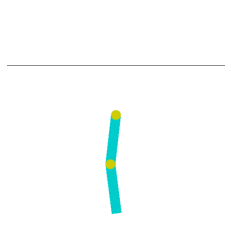

In [3]:
from dqn_agent_Acro import Agent

agent = Agent(state_size=6, action_size=3, seed=torch.random.seed())

# watch an untrained agent
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for j in range(200):
    action = agent.pick_action(state)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    #display.display(plt.gcf())
    #display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Episode 100	Average Score: -472.88
Episode 200	Average Score: -405.13
Episode 300	Average Score: -346.89
Episode 400	Average Score: -243.94
Episode 500	Average Score: -224.34
Episode 600	Average Score: -220.08
Episode 700	Average Score: -229.94
Episode 800	Average Score: -307.83
Episode 900	Average Score: -330.50
Episode 1000	Average Score: -316.45
Episode 1100	Average Score: -254.91
Episode 1200	Average Score: -218.60
Episode 1300	Average Score: -195.14
Episode 1400	Average Score: -170.13
Episode 1500	Average Score: -149.97
Episode 1600	Average Score: -144.46
Episode 1700	Average Score: -120.76
Episode 1800	Average Score: -128.58
Episode 1900	Average Score: -126.16
Episode 2000	Average Score: -132.03


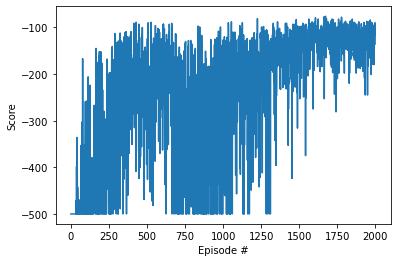

Wall time: 6min 45s


In [4]:
%%time

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.05, eps_decay=0.99):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.pick_action(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            #breakpoint()
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=-91:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_Acro.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

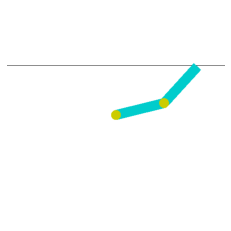

In [5]:
# load the weights from file
#agent.qnetwork_local.load_state_dict(torch.load('checkpoint_MNTC.pth'))

for i in range(10):
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    for j in range(200):
        action = agent.pick_action(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        #display(plt.gcf())
        #display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

In [6]:
state

array([-0.63831657,  0.76977396,  0.93878087,  0.34451483,  1.72698575,
       -0.76263951])

In [7]:
import pandas as pd
pd.DataFrame(agent.qnetwork_local.fc1.weight.data.cpu().numpy())

,0,1,2,3,4,5
0,-5.437404,0.397916,-0.146719,-0.564633,2.423887,0.281015
1,0.675257,-1.497729,0.288363,0.810361,1.991334,-2.108809
2,-0.892791,-0.219432,2.528375,-0.073438,-3.582177,-2.241998
3,-5.477118,-6.493919,-2.044894,-0.666220,-0.285568,-0.691373
4,4.466696,1.508916,2.415911,2.017746,-0.228768,-0.554965
5,-2.999593,-0.236030,1.457819,1.002015,1.031996,1.576316
6,0.740643,2.180237,0.366459,-0.377653,-2.222759,1.722441
7,-3.472591,-0.015725,3.978273,0.515693,3.976919,1.952998
8,6.229371,-0.876674,3.406709,-0.289739,-0.042921,-0.064883
9,-3.157311,-2.233999,-1.815392,-0.531343,-2.099922,-0.175566
